In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
# Importing dataset
housing = pd.read_csv('../datasets/housing.csv')

# One-hot encoding the categorical feature: ocean_proximity
encoder = OneHotEncoder()

one_hot_encoded = encoder.fit_transform(housing[['ocean_proximity']])
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['ocean_proximity']))

df_encoded = pd.concat([housing, one_hot_df], axis=1)

df_encoded = df_encoded.rename(columns={'ocean_proximity_ISLAND': 'ISLAND','ocean_proximity_INLAND': 'INLAND','ocean_proximity_<1H OCEAN': '1H_OCEAN', 'ocean_proximity_NEAR BAY': 'NEAR_BAY', 'ocean_proximity_NEAR OCEAN': 'NEAR_OCEAN'})

housing = df_encoded

print(f"Housing shape: {housing.shape}")
print(f"Housing columns: {housing.columns}")

Housing shape: (20640, 15)
Housing columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '1H_OCEAN', 'INLAND', 'ISLAND',
       'NEAR_BAY', 'NEAR_OCEAN'],
      dtype='object')


In [3]:
# Getting all the clean samples with original indices

clean_rows = housing.dropna()
clean_indices = clean_rows.index
clean_housing = housing.loc[clean_indices]

missing_housing = housing[housing.isnull().any(axis=1)]
missing_housing = missing_housing.drop(columns=['ocean_proximity'])


print(f"Clean housing shape: {clean_housing.shape}")
print(f"Missing housing shape: {missing_housing.shape}")

Clean housing shape: (20433, 15)
Missing housing shape: (207, 14)


In [4]:
# 80-20 train-test split

indices = clean_housing.index
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=21, stratify=clean_housing['ocean_proximity'])

train_df = clean_housing.loc[train_indices]
train_df = train_df.drop(columns=['ocean_proximity'])
test_df = clean_housing.loc[test_indices]
test_df = test_df.drop(columns=['ocean_proximity'])
print(f"train_df shape: {train_df.shape}")
print(f"test_df shape: {test_df.shape}")
print(test_df)

train_df shape: (16346, 14)
test_df shape: (4087, 14)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
923      -121.89     37.49                 9.0       4909.0           577.0   
7916     -118.08     33.87                23.0       2536.0           552.0   
2770     -115.91     33.36                15.0        459.0            95.0   
7581     -118.23     33.89                16.0       5003.0          1180.0   
18994    -121.95     38.43                19.0       3011.0           551.0   
...          ...       ...                 ...          ...             ...   
15831    -122.43     37.76                52.0       2332.0           434.0   
9928     -122.31     38.30                45.0       3023.0           659.0   
673      -122.17     37.70                24.0       1755.0           365.0   
19670    -120.84     37.51                14.0       6337.0          1593.0   
19938    -119.33     36.28                16.0       2624.0           527.0  

In [5]:
# Performing imputation
for index, row in missing_housing.iterrows():
    X = train_df.drop(columns=['total_bedrooms'])
    y = train_df['total_bedrooms']
    
    # Normalizing features
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X)
    
    # Fitting the model with the optimal parameter
    model = KNeighborsRegressor(7)
    model.fit(X_train_normalized, y)
    
    # Normalizing the row with missing value
    X_missing = row.drop('total_bedrooms').values.reshape(1, -1)
    X_missing_normalized = scaler.transform(X_missing)
    
    # Predicting the missing value
    predicted_value = model.predict(X_missing_normalized)[0]
    
    # Rounding the predicted number to the nearest int and storing in the df
    missing_housing.at[index, 'total_bedrooms'] = round(predicted_value)

/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid

/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid

/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid

/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid

/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/rcn/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid

In [6]:
# Adding the imputed rows to the training set
train_df = pd.concat([train_df, missing_housing], ignore_index=True)
print(f"train_df shape: {train_df.shape}")
print(train_df.head)

one_hot_columns = ['1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']
one_hot_df = train_df[one_hot_columns]

# Create combined column
train_df['ocean_proximity'] = one_hot_df.apply(lambda x: one_hot_df.columns[x.eq(1)][0], axis=1)
train_df = train_df.drop(columns=one_hot_columns)
print(f"train_df shape: {train_df.shape}")
print(train_df.head)

train_df shape: (16553, 14)
<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -117.65     33.46                19.0       7034.0          1139.0   
1        -122.65     38.46                14.0       2096.0           420.0   
2        -117.91     33.61                27.0       1797.0           343.0   
3        -116.32     34.14                18.0       1880.0           487.0   
4        -121.22     37.79                38.0       2152.0           451.0   
...          ...       ...                 ...          ...             ...   
16548    -119.19     34.20                18.0       3620.0           915.0   
16549    -119.18     34.19                19.0       2393.0           582.0   
16550    -118.88     34.17                15.0       4260.0           754.0   
16551    -118.75     34.29                17.0       5512.0           791.0   
16552    -118.72     34.28                17.0       3051.0           464

In [7]:
one_hot_columns = ['1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']
one_hot_df_test = test_df[one_hot_columns]
test_df['ocean_proximity'] = one_hot_df_test.apply(lambda x: one_hot_df_test.columns[x.eq(1)][0], axis=1)
test_df = test_df.drop(columns=one_hot_columns)

print(f"test_df shape: {test_df.shape}")
print(test_df.head)

test_df shape: (4087, 10)
<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
923      -121.89     37.49                 9.0       4909.0           577.0   
7916     -118.08     33.87                23.0       2536.0           552.0   
2770     -115.91     33.36                15.0        459.0            95.0   
7581     -118.23     33.89                16.0       5003.0          1180.0   
18994    -121.95     38.43                19.0       3011.0           551.0   
...          ...       ...                 ...          ...             ...   
15831    -122.43     37.76                52.0       2332.0           434.0   
9928     -122.31     38.30                45.0       3023.0           659.0   
673      -122.17     37.70                24.0       1755.0           365.0   
19670    -120.84     37.51                14.0       6337.0          1593.0   
19938    -119.33     36.28                16.0       2624.0           527.0

In [8]:
train_df = train_df.drop(columns=['ocean_proximity'])
test_df = test_df.drop(columns=['ocean_proximity'])

In [9]:
# # Combine the datasets
# combined_data = pd.concat([train_df, test_df])

# # Perform one-hot encoding
# one_hot_encoded_data = pd.get_dummies(combined_data, columns=['ocean_proximity'])

# # Split the datasets back into their original sets
# train_one_hot_encoded = one_hot_encoded_data.iloc[:len(train_df), :]
# test_one_hot_encoded = one_hot_encoded_data.iloc[len(train_df):, :]

# train_df = train_one_hot_encoded
# test_df = test_one_hot_encoded

In [10]:
# Removing outliers with z-score Z-score > 3 or < -3 in any column

z_scores = (train_df - train_df.mean()) / train_df.std()

threshold = 3

outlier_rows = (z_scores > threshold).any(axis=1)
outliers_df = train_df[outlier_rows]

train_df_no_outliers = train_df[~outlier_rows]

print(f"train_df_no_outliers shape: {train_df_no_outliers.shape}")
print(f"outliers_df shape: {outliers_df.shape}")

train_df_no_outliers shape: (15852, 9)
outliers_df shape: (701, 9)


In [25]:
X = train_df_no_outliers.drop(columns=['median_house_value'])
y = train_df_no_outliers['median_house_value']

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

X_test = test_df.drop(columns=['median_house_value'])
X_test_normalized = (X_test - X_mean) / X_std
y_test = test_df['median_house_value']

In [56]:
from gradient_descent import GDRegressor

learning_rate = 0.01
max_iter = 1000

model = GDRegressor(learning_rate, max_iter)

model.fit(X_normalized,y)

print(f"Optimal w: {model.optimal_w}")
print(f"Optimal cost: {model.history[-1][1]}")

X shape: (15852, 8)
y shape: (15852,)
w: [-1.85988583 -2.03750178 -1.25899824  1.58853117 -0.88619643 -0.29766849
 -0.80886296  0.06549258 -0.71896707]
X_bias shape: (15852, 9)
Itaration 0:
 New w: [2017.28093357  -52.12134183 -164.83541454  133.26073605  180.82183195
   74.96453329  -48.91718466   96.09126849  729.37915725]
 Gradient: [-201914.08193983    5008.38400563   16357.64163042  -13167.22048787
  -18170.80283805   -7526.22017736    4810.83217053   -9602.5775912
  -73009.8124314 ]
Itaration 1:
 New w: [4016.23034477 -102.99555329 -326.58173146  265.54766311  358.18458208
  147.81499283  -99.17686373  189.4359595  1451.76700554]
 Gradient: [-199894.94112043    5087.42114543   16174.63169218  -13228.69270604
  -17736.27501261   -7285.04595407    5025.9679068    -9334.46910103
  -72238.7848297 ]
Itaration 2:
 New w: [5995.19026186 -154.63150519 -486.53589063  398.39713805  531.32990042
  218.36216117 -151.48431354  280.21107912 2166.53401019]
 Gradient: [-197895.99170923    5163.5

Itaration 79:
 New w: [111550.98320012  -5074.6764109   -9362.93285985  10161.58284191
   6887.5351719    3110.35014962  -6144.64697      4116.54336099
  39832.60463502]
 Gradient: [-91273.97864028   6636.0136167    8728.61300911 -10832.21327003
  -3312.15282568  -3064.95181267   7858.10090731  -3696.01066986
 -32292.38618201]
Itaration 80:
 New w: [112454.59558866  -5140.96805928  -9449.74821558  10269.29781876
   6919.91264628   3141.07549803  -6223.00238518   4153.46076441
  40152.27744706]
 Gradient: [-90361.23885388   6629.16483765   8681.53557294 -10771.49768569
  -3237.74743806  -3072.5348412    7835.54151841  -3691.74034284
 -31967.28120433]
Itaration 81:
 New w: [113349.17185331  -5207.1888871   -9536.0993158   10376.40540232
   6951.55745684   3171.87875318  -6301.13031216   4190.33871215
  40468.73319818]
 Gradient: [-89457.62646534   6622.08278268   8635.11002214 -10710.75835561
  -3164.48105545  -3080.32551529   7812.79269839  -3687.7947738
 -31645.5751117 ]
Itaration 82:


Itaration 118:
 New w: [140852.50805136  -7592.5269447  -12454.76637719  13918.14196225
   7691.92244908   4374.03553564  -9025.63771175   5544.46441206
  50195.28991852]
 Gradient: [-61676.47879055   6255.9968669    7283.71094365  -8521.45780041
  -1068.36199868  -3409.35582175   6940.42402932  -3655.19109464
 -21824.84456343]
Itaration 119:
 New w: [141463.10519138  -7654.97214628 -12527.3171263   14002.79454466
   7702.1681412    4408.21130595  -9094.81528654   5581.01807267
  50411.37311187]
 Gradient: [-61059.71400264   6244.52015806   7255.07491104  -8465.25824094
  -1024.56921257  -3417.5770302    6917.75747942  -3655.36606079
 -21608.31933498]
Itaration 120:
 New w: [142067.59636001  -7717.30223107 -12599.58481     14086.88718611
   7711.98119739   4442.46840226  -9163.76720362   5617.5733956
  50625.31333475]
 Gradient: [-60449.11686262   6233.00847872   7226.76837001  -8409.26414542
   -981.30561842  -3425.70963134   6895.19170837  -3655.53229328
 -21394.02228752]
Itaration 1

Itaration 212:
 New w: [178173.18720756 -12966.28457445 -18354.32840313  19737.30900489
   7284.23736825   7808.559145   -14693.5793092    8940.91264087
  63503.6424361 ]
 Gradient: [-23978.82307721   5227.69455591   5542.52494848  -4251.37888341
   1474.00913913  -3759.24916533   5293.59459905  -3515.14727041
  -8700.79169037]
Itaration 213:
 New w: [178410.57755602 -13018.4684825  -18409.63504071  19779.47775002
   7269.34376573   7846.15040425 -14746.38596193   8976.03233313
  63589.82161959]
 Gradient: [-23739.03484644   5218.39080488   5530.66375746  -4216.87451307
   1489.36025219  -3759.12592438   5280.66527241  -3511.96922619
  -8617.91834907]
Itaration 214:
 New w: [178645.594001   -13070.55977334 -18464.82394723  19821.3035662
   7254.29832798   7883.73986058 -14799.0640616    9011.12000248
  63675.18039835]
 Gradient: [-23501.64449797   5209.12908397   5518.89065255  -4182.58161832
   1504.54377511  -3758.94563346   5267.80996689  -3508.76693431
  -8535.87787645]
Itaration 2

Itaration 289:
 New w: [190963.25769752 -16742.61082914 -22320.59729885  22123.04422155
   5794.94575391  10665.07396995 -18428.88827797  11538.81316853
  68242.81865358]
 Gradient: [-11059.55995604   4625.43619635   4826.77927963  -2148.786546
   2268.5165429   -3627.38860111   4470.91446356  -3224.79383953
  -4235.11740048]
Itaration 290:
 New w: [191072.74734108 -16788.80054754 -22368.79210573  22144.32401457
   5772.19752812  10701.31944167 -18473.5086314   11571.02011578
  68284.78643762]
 Gradient: [-10948.96435648   4618.97183978   4819.48068754  -2127.97930238
   2274.82257849  -3624.54717228   4462.03534311  -3220.69472545
  -4196.77840317]
Itaration 291:
 New w: [191181.14208821 -16834.92592176 -22416.91431051  22165.39717332
   5749.38702395  10737.53631529 -18518.04054969  11603.18604467
  68326.37461489]
 Gradient: [-10839.47471292   4612.53742182   4812.22047852  -2107.31587522
   2281.0504171   -3621.6873615    4453.19182946  -3216.59288882
  -4158.81772752]
Itaration 29

Itaration 349:
 New w: [195921.42347905 -19409.39863907 -25095.22457982  23079.16096519
   4343.04056686  12784.31068508 -20960.28483393  13398.39408147
  70200.60875378]
 Gradient: [-6051.31169187  4284.39610389  4446.05718389 -1128.04052815
  2531.06489305 -3433.3562209   3991.78210306 -2978.41687104
 -2490.63934855]
Itaration 350:
 New w: [195981.3314648  -19452.19279339 -25139.62993325  23090.3059678
   4317.70262409  12818.60918479 -21000.13061689  13428.1377291
  70225.30271972]
 Gradient: [-5990.79857495  4279.41543125  4440.53534345 -1114.50026071
  2533.79427731 -3429.84997073  3984.57829654 -2974.36476287
 -2469.39659387]
Itaration 351:
 New w: [196040.64037069 -19494.9373391  -25183.98029216  23101.31656325
   4292.33782555  12852.87256968 -21039.90457778  13457.84088929
  70249.78632117]
 Gradient: [-5930.8905892   4274.45457106  4435.0358908  -1101.05954586
  2536.47985388 -3426.33848893  3977.39608827 -2970.31601885
 -2448.3601455 ]
Itaration 352:
 New w: [196099.35618753

Itaration 393:
 New w: [198062.46538399 -21247.83301132 -26999.74469896  23454.66119297
   3207.98902136  14259.72569166 -22648.19657638  14669.32994571
  71112.62973408]
 Gradient: [-3888.64310102  4082.21174486  4222.04777671  -618.3937474
  2614.76049319 -3275.79910584  3693.33826228 -2803.91236653
 -1726.44936622]
Itaration 394:
 New w: [198100.96295069 -21288.61280098 -27041.91827493  23460.74789096
   3181.82991705  14292.4474533  -22685.06611497  14697.33043019
  71129.75558131]
 Gradient: [-3849.75667001  4077.97896623  4217.35759755  -608.66979917
  2615.91043062 -3272.17616414  3686.95385907 -2800.04844831
 -1712.58472317]
Itaration 395:
 New w: [198139.07554172 -21329.35040622 -27084.04510666  23466.73809292
   3155.65960044  14325.1329811  -22721.87196937  14725.29232511
  71146.74411079]
 Gradient: [-3811.25910331  4073.76052373  4212.6831725   -599.02019584
  2617.03166085 -3268.55277922  3680.58543976 -2796.18949247
 -1698.85294838]
Itaration 396:
 New w: [198176.8070068

Itaration 452:
 New w: [199784.52515139 -23585.84963653 -29412.60152288  23670.53467093
   1653.54372384  16128.49720559 -24719.30692394  16257.01498621
  71925.54373247]
 Gradient: [-2149.18879052  3853.9120166   3968.8598692   -156.76042334
  2641.33080684 -3063.39145869  3341.25308395 -2584.85927253
 -1098.41724953]
Itaration 453:
 New w: [199805.80212041 -23624.3533177  -29452.25079053  23672.04116749
   1627.13190724  16159.09566434 -24752.66366298  16282.82805813
  71936.44889919]
 Gradient: [-2127.69690261  3850.36811701  3964.92676588  -150.64965626
  2641.18166002 -3059.84587528  3335.6739043  -2581.30719144
 -1090.51667253]
Itaration 454:
 New w: [199826.86631975 -23662.82165305 -29491.86083024  23673.48704858
   1600.72174487  16189.65869388 -24785.96472711  16308.60566328
  71947.27580124]
 Gradient: [-2106.41993359  3846.83353567  3961.00397105  -144.58810922
  2641.01623635 -3056.30295418  3330.10641239 -2577.76051466
 -1082.69020432]
Itaration 455:
 New w: [199847.719877

Itaration 512:
 New w: [ 2.00748039e+05 -2.58363814e+04 -3.17253224e+04  2.36687734e+04
  7.65967045e+01  1.79027446e+04 -2.66259213e+04  1.77448530e+04
  7.24632935e+04]
 Gradient: [-1175.94292248  3655.74699627  3749.01028183   133.74502714
  2608.27770214 -2856.2364552   3025.62471551 -2381.15842887
  -733.90133139]
Itaration 513:
 New w: [ 2.00759680e+05 -2.58729080e+04 -3.17627783e+04  2.36673989e+04
  5.05228578e+01  1.79312735e+04 -2.66561280e+04  1.77686323e+04
  7.24705873e+04]
 Gradient: [-1164.18349326  3652.66160344  3745.59099404   137.45244685
  2607.38467059 -2852.89194487  3020.66945853 -2377.92207519
  -729.37926931]
Itaration 514:
 New w: [ 2.00771206e+05 -2.59094038e+04 -3.18002001e+04  2.36659876e+04
  2.44580322e+01  1.79597690e+04 -2.66862852e+04  1.77923792e+04
  7.24778363e+04]
 Gradient: [-1152.54165833  3649.5823855   3742.17874826   141.12810471
  2606.48256842 -2849.55127564  3015.72349436 -2374.69076458
  -724.89842968]
Itaration 515:
 New w: [ 2.00782616e+

Itaration 578:
 New w: [201312.50792513 -28183.63721018 -34127.15346925  23512.08977556
  -1621.38752484  19715.80968145 -28517.51678082  19247.20592019
  72864.72193283]
 Gradient: [ -605.77184734  3463.7423674   3536.75978163   319.98901359
  2533.43185563 -2644.04683625  2717.29833086 -2177.94412214
  -508.14377211]
Itaration 579:
 New w: [201318.50506642 -28218.24713195 -34162.49076616  23508.86940107
  -1646.70851279  19742.2193643  -28544.64579874  19268.95612107
  72869.77835472]
 Gradient: [ -599.71412887  3460.99217685  3533.72969141   322.03744899
  2532.09879465 -2640.96828501  2712.90179259 -2175.02008791
  -505.64218826]
Itaration 580:
 New w: [201324.44223629 -28252.82959323 -34197.79781125  23505.62873509
  -1672.01612372  19768.59830274 -28571.73092868  19290.67712561
  72874.80997876]
 Gradient: [ -593.71698758  3458.24612786  3530.70450924   324.06659759
  2530.76109265 -2637.89384367  2708.51299367 -2172.10045408
  -503.1624046 ]
Itaration 581:
 New w: [201330.320034

Itaration 633:
 New w: [201567.17368133 -30047.41357882 -36026.98548872  23309.39270213
  -2993.12264021  21123.76060708 -29946.40547269  20401.22884562
  73111.02685807]
 Gradient: [ -348.53370977  3318.09326249  3376.81186402   407.5437525
  2454.36183422 -2480.79333627  2486.53049042 -2023.4007273
  -398.09875543]
Itaration 634:
 New w: [201570.62416505 -30080.56899365 -36060.72568794  23305.30545314
  -3017.65099564  21148.5399901  -29971.23081964  20421.43588897
  73114.99220004]
 Gradient: [ -345.04837267  3315.54148281  3374.01992145   408.72489902
  2452.83554272 -2477.93830155  2482.53469419 -2020.70433543
  -396.534197  ]
Itaration 635:
 New w: [201574.04014394 -30113.69892201 -36094.43800582  23301.20651847
  -3042.16406295  21173.29086261 -29996.01627721  20441.61600718
  73118.94202544]
 Gradient: [ -341.59788895  3312.99283615  3371.23178812   409.89346694
  2451.30673046 -2475.08725132  2478.54575709 -2018.0118208
  -394.9825404 ]
Itaration 636:
 New w: [201577.42196304 

Itaration 711:
 New w: [201754.66960359 -32559.19231639 -38577.6752983   22963.73507722
  -4858.89975182  22973.90333417 -31768.01596447  21899.34300462
  73381.94808375]
 Gradient: [ -159.1438893   3127.52230798  3169.41390197   468.45498938
  2329.67259179 -2269.73851687  2194.47255978 -1824.08130911
  -306.99947764]
Itaration 712:
 New w: [201756.2451281  -32590.44411248 -38609.34408714  22959.04605697
  -4882.17997123  22996.57514338 -31789.92570271  21917.55962878
  73385.00958901]
 Gradient: [ -157.55245041  3125.17960895  3166.87888383   468.90202477
  2328.02194168 -2267.1809211   2190.97382317 -1821.66241546
  -306.15052559]
Itaration 713:
 New w: [201757.80489736 -32621.67250463 -38640.98755436  22954.35263377
  -4905.44367579  23019.22141283 -31811.80051273  21935.75209655
  73388.06266666]
 Gradient: [ -155.9769259   3122.83921517  3164.34672185   469.34232062
  2326.3704552  -2264.62694449  2187.48100241 -1819.24677776
  -305.30776567]
Itaration 714:
 New w: [201759.349068

Itaration 772:
 New w: [201826.87824293 -34423.51371859 -40464.1139357   22671.79319785
  -6248.54608068  24311.41924375 -33042.66279567  22967.4854009
  73555.21737953]
 Gradient: [  -86.20586976  2988.59247416  3019.70798359   485.15793448
  2227.93233568 -2120.15961499  1991.50597982 -1682.24881173
  -264.7310179 ]
Itaration 773:
 New w: [201827.73168104 -34453.37750323 -40494.28726178  22666.94039408
  -6270.80862146  24332.59737566 -33062.54629108  22984.28556716
  73557.85909661]
 Gradient: [  -85.34381107  2986.37846326  3017.33260764   485.28037696
  2226.25407781 -2117.8131912   1988.3495409  -1680.01662693
  -264.17170762]
Itaration 774:
 New w: [201828.57658477 -34483.21916712 -40524.43685811  22662.08640656
  -6293.05437847  24353.75207633 -33082.39827521  23001.06344032
  73560.49525575]
 Gradient: [  -84.49037296  2984.16638921  3014.95963325   485.39875143
  2224.57570118 -2115.47006686  1985.19841335 -1677.78731541
  -263.61591488]
Itaration 775:
 New w: [201829.4130394

Itaration 848:
 New w: [201872.46201314 -36631.4211745  -42691.27063846  22302.05234717
  -7892.68971828  25856.42849867 -34467.61360933  24182.71051056
  73742.23838765]
 Gradient: [  -40.16165743  2825.55537253  2845.64449759   484.962929
  2100.59038496 -1950.87658361  1766.12667428 -1520.42189397
  -230.32522591]
Itaration 849:
 New w: [201872.85961355 -36659.6559466  -42719.70500669  22297.20377562
  -7913.67895917  25875.91616368 -34485.247097    24197.89444469
  73744.53798287]
 Gradient: [  -39.76004086  2823.47721004  2843.43682266   484.85715512
  2098.92408953 -1948.76650104  1763.34876698 -1518.39341307
  -229.95952252]
Itaration 850:
 New w: [201873.25323796 -36687.86995366 -42748.11731851  22292.35628287
  -7934.65154099  25895.38275708 -34502.85285216  24213.058119
  73746.83393869]
 Gradient: [  -39.36244045  2821.40070651  2841.23118239   484.74927527
  2097.25818153 -1946.65933951  1760.5755164  -1516.36743104
  -229.59558124]
Itaration 851:
 New w: [201873.64292612 -

Itaration 905:
 New w: [201889.80116059 -38208.13655876 -44277.40763921  22027.94842705
  -9062.62048592  26934.4301072  -35429.79043504  25016.57360673
  73867.96186672]
 Gradient: [  -22.64736708  2709.67287683  2722.95020677   476.06803221
  2006.35526836 -1835.12862586  1614.9884528  -1408.66602142
  -211.88482307]
Itaration 906:
 New w: [201890.02536952 -38235.21341178 -44304.61616886  22023.1897444
  -9082.66766236  26952.76188445 -35445.91507058  25030.64134166
  73870.07784928]
 Gradient: [  -22.42089341  2707.68530199  2720.85296513   475.86826517
  2004.71764392 -1833.17772485  1612.46355458 -1406.77349388
  -211.59825574]
Itaration 907:
 New w: [201890.24733637 -38262.2704043  -44331.80374456  22018.43307184
  -9102.69846861  26971.07417933 -35462.01449935  25044.69017407
  73872.1909768 ]
 Gradient: [  -22.19668448  2705.69925197  2718.75756961   475.66725605
  2003.08062504 -1831.22948773  1609.9428765  -1404.88324059
  -211.31275264]
Itaration 908:
 New w: [201890.4670835

Itaration 959:
 New w: [201899.19178377 -39642.23806499 -45717.13177192  21774.12655015
 -10121.90188866  27897.11318215 -36265.47216168  25749.73396746
  73978.37468347]
 Gradient: [  -13.16188912  2604.47991727  2612.27428613   463.77090775
  1918.85721215 -1733.48793412  1484.50587397 -1309.63802736
  -197.72930971]
Itaration 960:
 New w: [201899.32208648 -39668.26378591 -45743.23450156  21769.49136036
 -10141.07444889  27914.42993143 -36280.29414891  25762.8126016
  73980.34957269]
 Gradient: [  -13.03027023  2602.57209198  2610.27296444   463.51897888
  1917.25602386 -1731.67492871  1482.19872308 -1307.86341446
  -197.48892199]
Itaration 961:
 New w: [201899.45108615 -39694.27044289 -45769.31723509  21764.85869704
 -10160.23100462  27931.7285751  -36295.09310307  25775.87351056
  73982.32206476]
 Gradient: [  -12.89996752  2600.66569802  2608.2733521    463.26633195
  1915.65557229 -1729.86436618  1479.89541541 -1306.09089582
  -197.2492061 ]
Itaration 962:
 New w: [201899.5787958

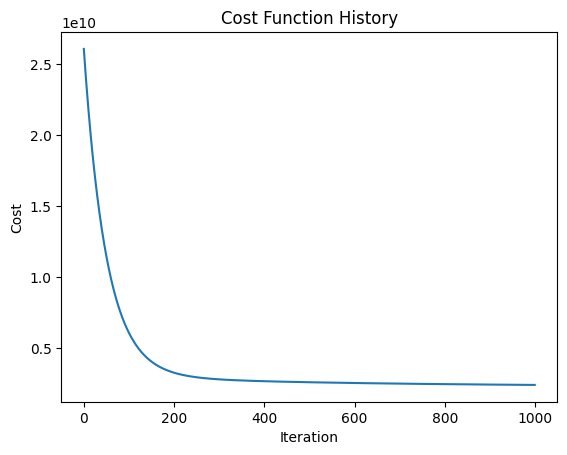

In [57]:
model.plot_cost_history()

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#print(X.iloc[0].shape)
predictions = model.predict(X_test_normalized)

rms = sqrt(mean_squared_error(y_test, predictions, squared=False))
print(f"rms: {rms}")
for i in range(len(y_test)):
    print(f"i: {i}, actual: {y_test.iloc[i]}, pred: {predictions[i]}")

rms: 265.71672689915465
i: 0, actual: 500001.0, pred: 419379.48462075705
i: 1, actual: 200800.0, pred: 199259.15672303078
i: 2, actual: 67500.0, pred: 15849.023174580856
i: 3, actual: 133400.0, pred: 98357.1893766845
i: 4, actual: 232800.0, pred: 228907.14451631205
i: 5, actual: 93100.0, pred: 61783.560732052676
i: 6, actual: 253300.0, pred: 249214.14250578368
i: 7, actual: 349000.0, pred: 304611.84276325215
i: 8, actual: 116100.0, pred: 172163.53195761342
i: 9, actual: 170900.0, pred: 187330.5574363007
i: 10, actual: 500001.0, pred: 361306.0359831447
i: 11, actual: 261500.0, pred: 286031.74706392165
i: 12, actual: 181500.0, pred: 238883.0735406833
i: 13, actual: 259700.0, pred: 222843.21758403842
i: 14, actual: 500001.0, pred: 373459.9210910258
i: 15, actual: 93800.0, pred: 96688.11366712293
i: 16, actual: 245500.0, pred: 197091.43430349723
i: 17, actual: 138100.0, pred: 94115.09983470471
i: 18, actual: 80200.0, pred: 115980.69367798175
i: 19, actual: 238600.0, pred: 221028.9434312638

i: 4018, actual: 268400.0, pred: 281808.49796432274
i: 4019, actual: 195100.0, pred: 208457.90677358338
i: 4020, actual: 138600.0, pred: 176923.6945103664
i: 4021, actual: 236000.0, pred: 183795.31698235837
i: 4022, actual: 137500.0, pred: 102045.15519515096
i: 4023, actual: 68100.0, pred: 120687.24775930554
i: 4024, actual: 379600.0, pred: 407841.2160384849
i: 4025, actual: 329600.0, pred: 255725.70121716446
i: 4026, actual: 237500.0, pred: 248533.6224287236
i: 4027, actual: 64800.0, pred: 94329.33268809108
i: 4028, actual: 500001.0, pred: 664139.7460313295
i: 4029, actual: 468000.0, pred: 275457.30118010845
i: 4030, actual: 113900.0, pred: 196917.88713529304
i: 4031, actual: 330000.0, pred: 283377.3069703212
i: 4032, actual: 96300.0, pred: 107979.26343054767
i: 4033, actual: 500001.0, pred: 259497.4966444669
i: 4034, actual: 116500.0, pred: 146909.74619810795
i: 4035, actual: 271200.0, pred: 281519.37108852
i: 4036, actual: 266800.0, pred: 217720.38477366712
i: 4037, actual: 266700.0